In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [3]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [4]:
import sklearn
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_106.csv')

In [6]:
df = df.iloc[len(df)-672:]

In [7]:
display(df.head())

,time,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,...,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
8753,2018-05-17 12:00:00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,11.8,66,1,5.6,50,3,12,0.0,0.00,2.48
8754,2018-05-17 13:00:00,0.0,0.0,0.0,0.0,18393,18048.0,0.0,161.0,1643.0,...,12.6,64,0,7.2,53,3,13,0.0,2.48,7.38
8755,2018-05-17 14:00:00,0.0,0.0,0.0,0.0,55694,55320.0,0.0,486.0,4123.0,...,12.8,63,0,10.3,61,3,14,0.0,7.38,5.72
8756,2018-05-17 15:00:00,0.0,0.0,0.0,0.0,48290,48006.0,0.0,412.0,3174.0,...,13.6,56,0,11.5,70,3,15,0.0,5.72,6.82
8757,2018-05-17 16:00:00,0.0,0.0,0.0,0.0,55609,55188.0,0.0,520.0,4176.0,...,13.6,54,1,9.7,88,3,16,0.0,6.82,62.11


lets ditch the forecast column

In [8]:
df.drop(columns=['electric_combined_1h_forecast'], inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 8753 to 9424
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         672 non-null    object 
 1   kettle                       672 non-null    float64
 2   microwave                    672 non-null    float64
 3   fridgefreezer                672 non-null    float64
 4   washingmachine               672 non-null    float64
 5   hot-water-hot-pipe           672 non-null    int64  
 6   hot-water-cold-pipe          672 non-null    float64
 7   gas                          672 non-null    float64
 8   shower                       672 non-null    float64
 9   mains                        672 non-null    float64
 10  cooker                       672 non-null    float64
 11  central-heating-flow         672 non-null    float64
 12  central-heating-return       672 non-null    float64
 13  temperature_2m (

In [10]:
df.time = pd.to_datetime(df.time).dt.to_period('h')

In [11]:
df.index = df.time

In [12]:
df_electric = pd.DataFrame(df['electric-combined'])

In [13]:
display(df_electric.head())

,electric-combined
time,
2018-05-17 12:00,0.00
2018-05-17 13:00,2.48
2018-05-17 14:00,7.38
2018-05-17 15:00,5.72
2018-05-17 16:00,6.82


In [14]:
train_len = int(len(df_electric) - 24)
train = df_electric[:train_len]
test = df_electric[train_len:]


In [15]:
train.shape

(648, 1)

In [16]:
test.shape

(24, 1)

In [17]:
train_mean = np.mean(train)
train_mean

12.994429012345678

In [18]:
train_std = np.std(train)
train_std

electric-combined    16.413873
dtype: float64

In [19]:
train_CoV = train_std/train_mean
train_CoV

electric-combined    1.263147
dtype: float64

In [20]:
CoV = pd.DataFrame({'Mean' : train_mean, 'Std_Dev' : train_std, 'Coeff_of_Var' : train_CoV})
CoV

,Mean,Std_Dev,Coeff_of_Var
electric-combined,12.994429,16.413873,1.263147


In [21]:
df.index.dtype

period[h]

In [22]:
df_electric.head(1)

,electric-combined
time,
2018-05-17 12:00,0.0


In [23]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 672 entries, 2018-05-17 12:00 to 2018-06-14 11:00
Freq: h
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   electric-combined  672 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


In [24]:
df_electric.index = df_electric.index.to_timestamp()

In [25]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2018-05-17 12:00:00 to 2018-06-14 11:00:00
Freq: h
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   electric-combined  672 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


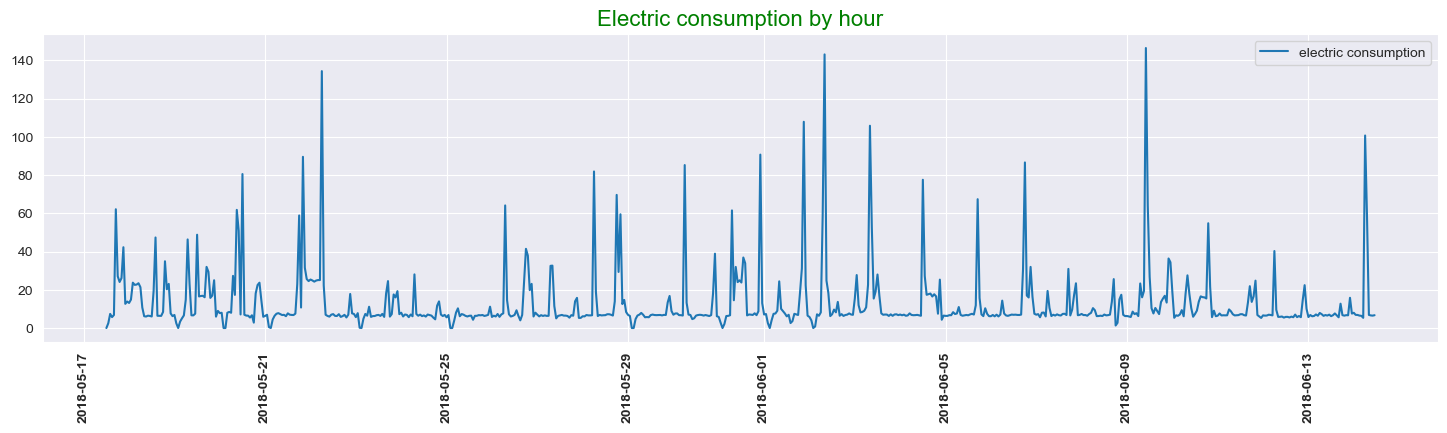

In [26]:
plt.figure(figsize=(18,4))
plt.plot(df_electric, label='electric consumption')
plt.legend(loc='best')
plt.title('Electric consumption by hour', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

Additive seasonal decomposition



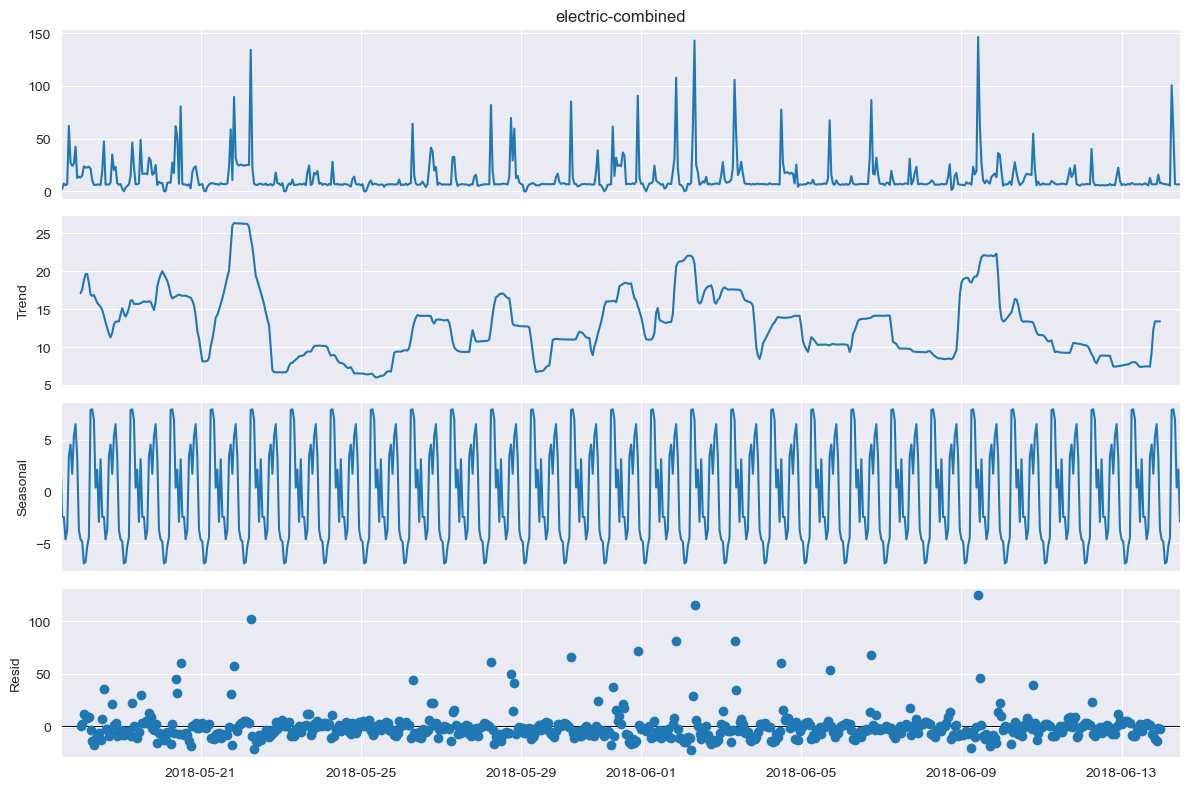

In [27]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_electric['electric-combined'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

Multiplicative seasonal decomposition



In [28]:
# decomposition = sm.tsa.seasonal_decompose(df_electric['electric-combined'], model='multiplicative') # multiplicative seasonal index
# fig = decomposition.plot()
# plt.show()

Multiplicative seasonal decomposition does not seem appropriate for me - : ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [29]:
train_len = int(len(df_electric) -24)
train = df_electric[:train_len]
test = df_electric[train_len:]

Simple time series methods

In [30]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['electric-combined'][train_len-1]

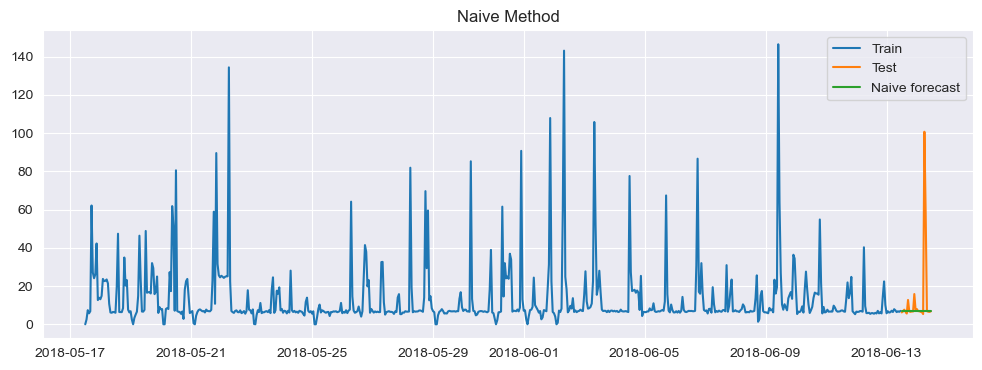

In [31]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_naive['naive_forecast'])/test['electric-combined'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,21.92,18.83


Simple average method


In [33]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['electric-combined'].mean()

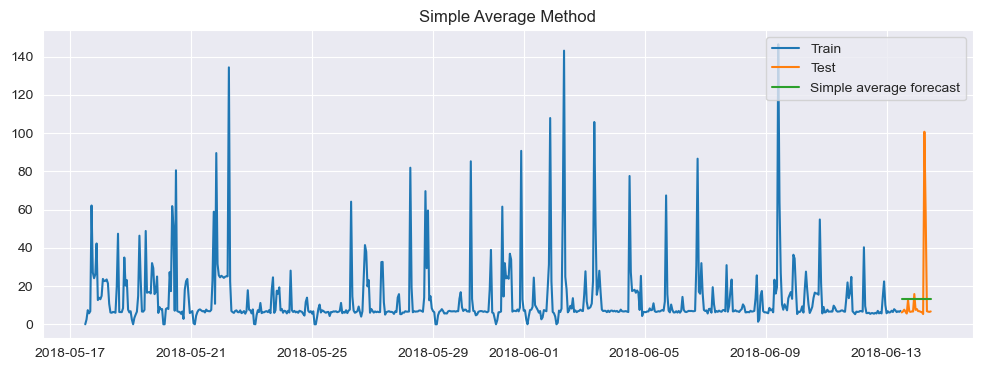

In [34]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [35]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_avg['avg_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,21.92,18.83
0,Simple average method,20.98,87.93


Simple moving average method


In [36]:
y_hat_sma = df_electric.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df_electric['electric-combined'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

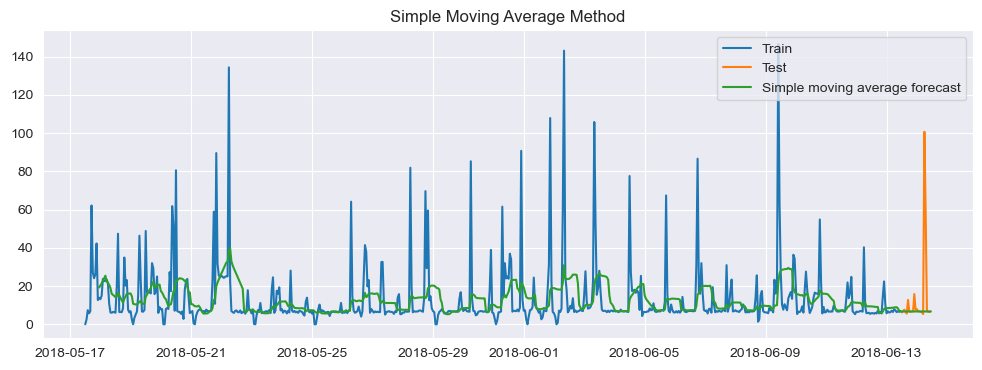

In [37]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [38]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_sma['sma_forecast'][train_len:])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,21.92,18.83
0,Simple average method,20.98,87.93
0,Simple moving average forecast,22.01,16.92


Exponential Smoothing Techniques


Simple exponential smoothing


In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['electric-combined'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

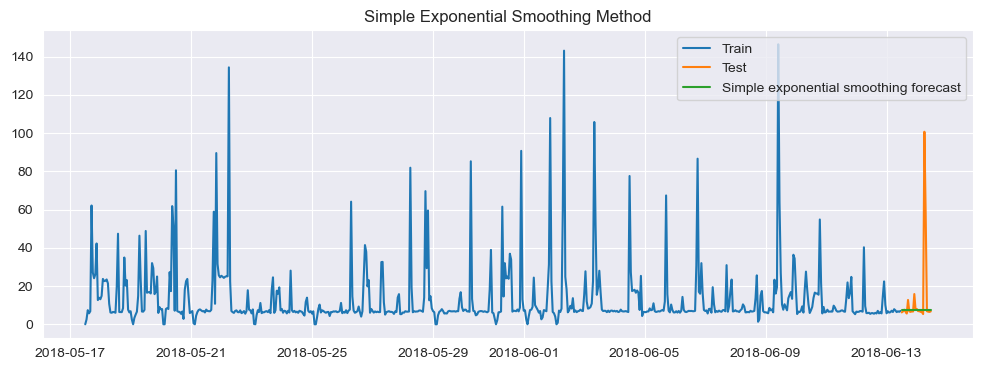

In [40]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [41]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_ses['ses_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,21.92,18.83
0,Simple average method,20.98,87.93
0,Simple moving average forecast,22.01,16.92
0,Simple exponential smoothing forecast,21.77,23.63


Holt's method with trend


In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['electric-combined']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 2.3769643474398232e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 14.39176288914258, 'initial_trend': -0.004306078399781264, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


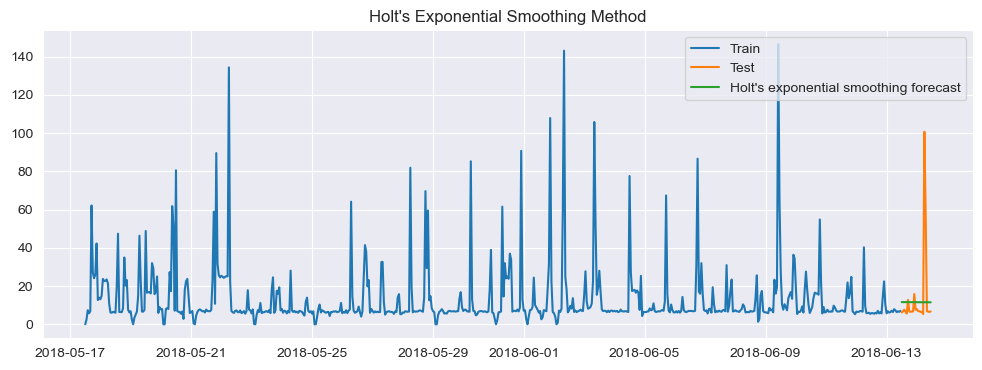

In [43]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [44]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_holt['holt_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,21.92,18.83
0,Simple average method,20.98,87.93
0,Simple moving average forecast,22.01,16.92
0,Simple exponential smoothing forecast,21.77,23.63
0,Holt's exponential smoothing method,21.06,70.57


Holt Winters' additive method with trend and seasonality


In [45]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['electric-combined']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.04768028512805162, 'smoothing_trend': 0.004313445490191088, 'smoothing_seasonal': 0.0495494762587835, 'damping_trend': nan, 'initial_level': 17.434785544927454, 'initial_trend': -0.018016280112284358, 'initial_seasons': array([-0.90676385, -4.42205075, -4.56154097, -6.44327632, -5.22628542,
        0.45921492,  6.22924784,  4.98610546,  5.3980469 ,  3.76980899,
        0.40130329, -4.94875199]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


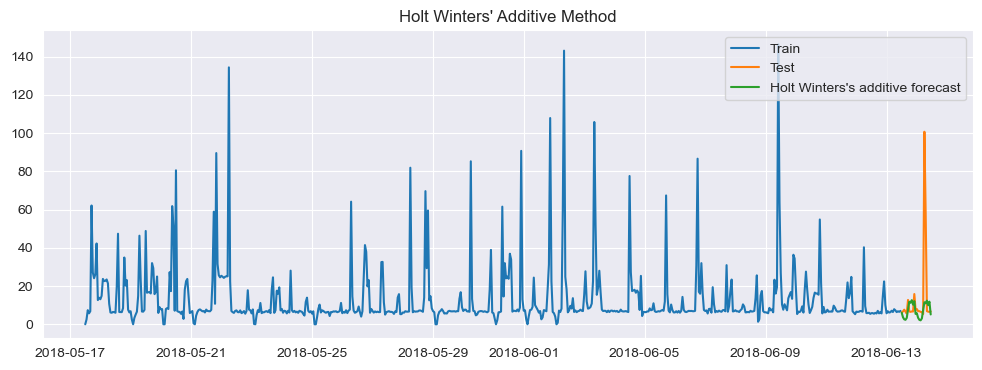

In [46]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [47]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_hwa['hw_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,21.92,18.83
0,Simple average method,20.98,87.93
0,Simple moving average forecast,22.01,16.92
0,Simple exponential smoothing forecast,21.77,23.63
0,Holt's exponential smoothing method,21.06,70.57
0,Holt Winters' additive method,20.96,54.60


In [48]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['electric-combined']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.